I examine how well `FIREFLY` fits the source spectra of LGal spectral mocks. 

In [22]:
import h5py
import numpy as np 
from astropy.table import Table
# -- FOMOspec -- 
from FOMOspec import util as UT
# 
import desispec.io as desiIO

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [5]:
galid = 1 

In [15]:
# read in source spectra (only to get the redshift)
f_name = 'gal_spectrum_'+str(galid)+'_BGS_template_BC03_Stelib.fits'
f_inspec = fits.open(''.join([UT.dat_dir(), 'Lgal/templates/', f_name]))
specin = f_inspec[1].data
wave_in = specin['wave']
flux_in = specin['flux_dust_nonoise'] * 1e20
zred = f_inspec[0].header['REDSHIFT']

# read desi-like spectra
f_name = 'gal_spectrum_'+str(galid)+'_BGS_template_BC03_Stelib.fits'
f_outspec = ''.join([UT.dat_dir(), 'Lgal/spectra/', 'desi_out_', f_name])
spec_desi = desiIO.read_spectra(f_outspec)

wave = np.concatenate([spec_desi.wave[b] for b in ['b', 'r', 'z']])
flux = np.concatenate([spec_desi.flux[b][0] for b in ['b', 'r', 'z']]) # 10-17 ergs/s/cm2/AA
flux_unc = np.concatenate([spec_desi.ivar[b][0]**-0.5 for b in ['b', 'r', 'z']])

In [16]:
def readFirefly(galid, dust='hpf_only'): 
    fname = ''.join([UT.dat_dir(), 'Lgal/templates/firefly.m11.MILES.imf_cha.dust_', dust, '.gal_spectrum_', str(galid), '_BGS_template_BC03_Stelib.hdf5'])
    f = h5py.File(fname, 'r')
    
    output = {} 
    for g in f.keys(): 
        if g == 'properties': 
            continue
        else: 
            output[g] = f[g].value
            
    props = {} 
    for k in f['properties'].keys(): 
        props[k] = f['properties'][k].value
    return output, props

Here's what the source spectra for 3 random galaxies look like

(0.0, 15.0)

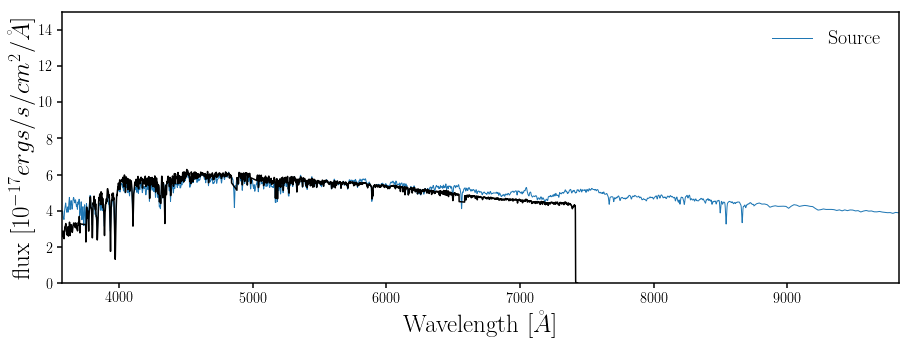

In [18]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
#sub.plot(wave, flux, c='k', lw=0.5, label='DESI-like')
sub.plot(wave_in/(1.+zred), flux_in, c='C0', lw=1, label='Source')
out, prop = readFirefly(galid, dust='hpf_only')
sub.plot(out['wavelength'], out['flux_bestfit'], c='k')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([wave.min(), wave.max()])
sub.set_ylabel('flux [$10^{-17} ergs/s/cm^2/\AA$]', fontsize=25)
sub.set_ylim([0., 15.])

(0.0, 15.0)

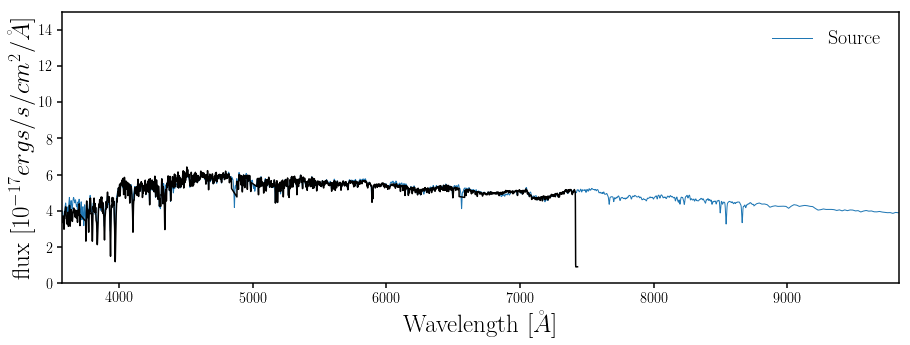

In [19]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
#sub.plot(wave, flux, c='k', lw=0.5, label='DESI-like')
sub.plot(wave_in/(1.+zred), flux_in, c='C0', lw=1, label='Source')
out, prop = readFirefly(galid, dust='on')
sub.plot(out['wavelength'], out['flux_bestfit'], c='k')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([wave.min(), wave.max()])
sub.set_ylabel('flux [$10^{-17} ergs/s/cm^2/\AA$]', fontsize=25)
sub.set_ylim([0., 15.])

Without proper dust fitting, `FIREFLY` doesn't do great...

In [23]:
def read_input(galID):
    #reads input star-formation and chemical enrichment histories
    infile = UT.dat_dir() + 'Lgal/gal_inputs/' + 'gal_input_' + str(galID) + '_BGS_template_FSPS_uvmiles.csv'
    gal_input = Table.read(infile, delimiter=' ')
    return gal_input

In [24]:
gal_input = read_input(galid)

In [26]:
prop

{u'EBV': 0.09333333333333334,
 u'IMF': 'Chabrier',
 u'Model': 'MILES',
 u'SFR_ssp_0': 8.62779812571687,
 u'SFR_ssp_1': 8.999590587346962,
 u'Zmax': 5.0,
 u'Zmin': -3.0,
 u'ageMax': 15,
 u'ageMin': 0,
 u'age_lightW': 0.44434018651396795,
 u'age_lightW_low_1sig': 0.44434018651396795,
 u'age_lightW_low_2sig': 0.44434018651396795,
 u'age_lightW_low_3sig': 0.44434018651396795,
 u'age_lightW_up_1sig': 0.44434018651396795,
 u'age_lightW_up_2sig': 0.8320847252127146,
 u'age_lightW_up_3sig': 0.8637068026164841,
 u'age_massW': 0.6065217886728328,
 u'age_massW_low_1sig': 0.6065217886728328,
 u'age_massW_low_2sig': 0.6065217886728328,
 u'age_massW_low_3sig': 0.6065217886728328,
 u'age_massW_up_1sig': 0.6065217886728328,
 u'age_massW_up_2sig': 1.060867993561234,
 u'age_massW_up_3sig': 1.0963555513499743,
 u'living_stars_mass': 9.213709584521885,
 u'living_stars_mass_ssp_0': 9.072491474378188,
 u'living_stars_mass_ssp_1': 8.657118239912768,
 u'log_age_ssp_0': 0.6989700043360189,
 u'log_age_ssp_1': -

(0.0, 0.04)

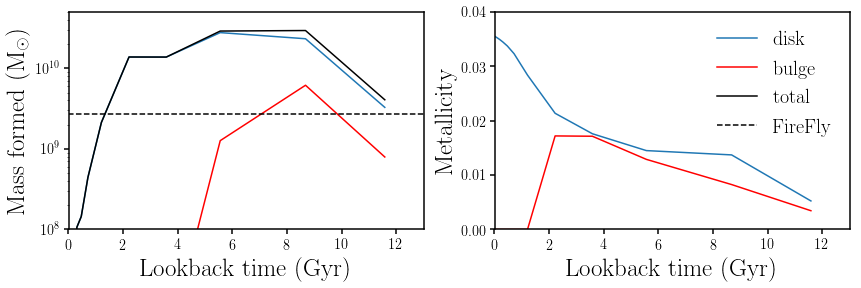

In [28]:
fig = plt.figure(figsize=(14,4))
sub = fig.add_subplot(121)
sub.plot(gal_input['sfh_t'], gal_input['sfh_disk'], color='C0')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'], color='red')
sub.plot(gal_input['sfh_t'], gal_input['sfh_bulge'] + gal_input['sfh_disk'], color='black')
mmed = 10**prop['total_mass']#np.percentile(chain_flat[:,4], [50])
sub.plot([0., 15.], [mmed, mmed], c='k', ls='--')
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel(r'Mass formed (M$_\odot$)', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e8, 5e10])

sub = fig.add_subplot(122) 
sub.plot(gal_input['sfh_t'], gal_input['Z_disk'], label='disk')
sub.plot(gal_input['sfh_t'], gal_input['Z_bulge'], color='red', label='bulge')
sub.plot([0., 0.], [0., 0.], c='k', ls='-', label='total')
sub.plot([0., 15.], [10**prop['metallicity_massW'], 10**prop['metallicity_massW']], c='k', ls='--', label='FireFly')
sub.legend(fontsize=20)
sub.set_xlabel('Lookback time (Gyr)', fontsize=25)
sub.set_xlim([1e-2, 13.])
sub.set_ylabel('Metallicity', fontsize=25)
sub.set_ylim([0., 0.04])